## Импорт необходимых библиотек

In [18]:
from scipy.stats import norm, rice
from viewtoolbox import *

# Для корректного отображения графика функции от двух переменных:
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

## Моделирование случайной величины с произвольным законом распределения

### Исходные параметры (константы)

$ \bullet $ Число опытов со случайным исходом $ - $ N_VALUES; 

$ \bullet $ Число точек для построения графиков $ - $ N_EDGES.

In [19]:
N_VALUES = 5000 # число опытов со случайным исходом
N_EDGES = 200   # число точек для построения графиков

### Формирование случайных величин, распределенных по нормальному закону распределения

Плотность вероятности СВ, распределенной по нормальному закону распределения, имеет следующий вид:
$$w(x) = \frac{1}{\sqrt{2\pi}\sigma} \cdot e^{-\frac{(x - m)^2}{2\sigma^2}},$$
где $m$ $-$ математическое ожидание; <br>
$\sigma$ $-$ среднеквадратичное отклонение (СКО).

**Параметры распределения:**

In [20]:
mu_param_ex = 2    # математическое ожидание
sigma_param_ex = 3 # СКО

**Формирование СВ с использованием встроенной функции:**

In [21]:
y_lib_ex = np.random.normal(loc=mu_param_ex, scale=sigma_param_ex, size=N_VALUES)    # нормально распределенные СВ

**Формирование СВ на основании равномерно распределенной СВ:**

Как известно, нормально распределённая СВ может быть получена как произведение двух независимых СВ, одна из которых распределена по закону Рэлея, а другая – по закону арксинуса:
$$y = \sigma \cdot y_1 \cdot y_2 + m,$$
где $y_1 = \sqrt{-2 \ln(x_1)}$ $-$ СВ, распределенная по закону Рэлея; <br>
$y_2 = \sin(2 \pi x_2)$ $-$ СВ, распределенная по закону арксинуса; <br>
$x_1$ и $x_2$ $-$ равномерно распределенные СВ.

*Формирование равномерно распределенных СВ:*

In [22]:
# Формирование равномерно распределенных СВ
x_1_ex = np.random.uniform(low=0, high=1, size=N_VALUES)
x_2_ex = np.random.uniform(low=0, high=1, size=N_VALUES)

*Отображение плотности вероятности исходного закона распределения:*

Плотность вероятности равномерно распределенной СВ имеет следующий вид:
$$w(x) = \frac{1}{b-a}, x \in (a, b).$$
При этом, огибающая гистограммы полученных величин должна сходиться к идеальному случаю.

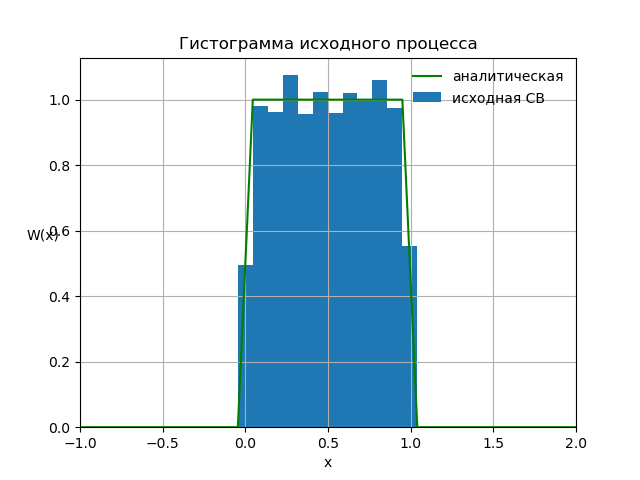

In [23]:
x_axis_ex = np.linspace(-3*sigma_param_ex, 3*sigma_param_ex, N_EDGES)    # интервал значений, на котором задана плотность вероятноси
# Идеальная плотность вероятности исходного закона распределения
wx_analityc_ex = (x_axis_ex>=0) & (x_axis_ex<=1)

plot_distrib_with_analyt(x_1_ex, x_axis_ex, wx_analityc_ex, ['Гистограмма исходного процесса', 'исходная СВ', 'x', (-1, 2)])

*Нелинейное преобразование равномерной СВ:*

In [24]:
y_1 = np.sqrt(-2 * np.log(x_1_ex)) # результат нелинейного преобразования - Рэлеевская СВ
y_2 = np.sin(2*np.pi*x_2_ex)       # результат нелинейного преобразования - Арксинусная СВ

*Графики функций, обеспечивающие нелинейное преобразование:*

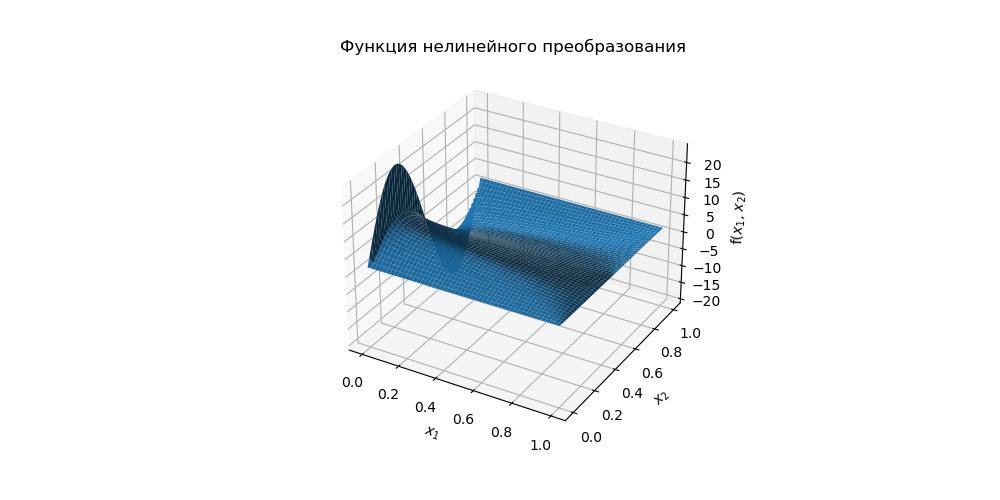

In [25]:
axises_ex = np.linspace(1e-12, 1, N_EDGES)  # значение по осям (в данном случае достаточно сформировать только один массив,
                                            # т.к. значения, откладываемые по обеим осям, будет одинаковое)
f_ex = lambda x_1, x_2: sigma_param_ex * np.sqrt(-2 * np.log(x_1)) * np.sin(2*np.pi*x_2) + mu_param_ex  # функция нелинейного преобразования

plot_3D_func(f_ex, axises_ex, axises_ex)

*Формирование целевого закона распределения:*

In [26]:
y_custom_ex = sigma_param_ex * y_1 * y_2 + mu_param_ex   # СВ, распределенные по нормальному закону распределения

*Отображение плотности вероятности целевого закона распределения:*

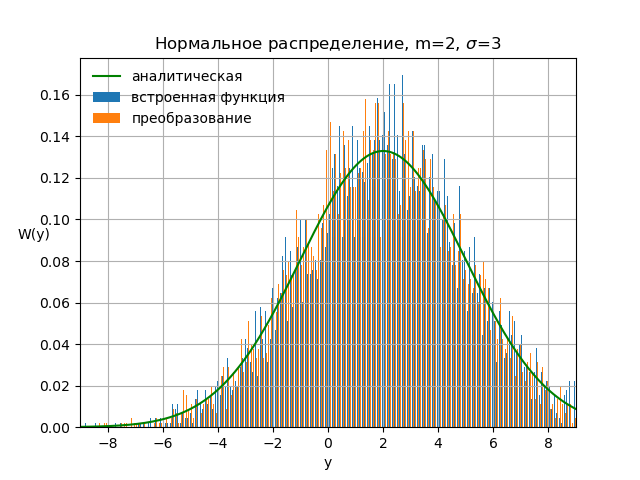

In [27]:
# Аналитическое значение СВ
w_analityc_ex = norm.pdf(x_axis_ex, loc=mu_param_ex, scale=sigma_param_ex)

plot_distrib_with_analyt([y_lib_ex, y_custom_ex], 
                         x_axis_ex, 
                         w_analityc_ex,
                         ['Нормальное распределение, m=' + str(mu_param_ex) + ', $\sigma$=' + str(sigma_param_ex), 
                          ['встроенная функция', 'преобразование'], 
                          'y'])

### Формирование случайных величин, распределенных по закону Райса

Плотность вероятности СВ, распределенной по закону распределения Райса, имеет следующий вид:
$$w(x) = \frac{x}{\sigma^2} \cdot e^{-\frac{x^2 + a^2}{2\sigma^2}} \cdot I_0\left(\frac{ax}{\sigma^2} \right), x \ge 0,$$
где $a$ и $\sigma$ $-$ параметры распределения.

**Параметры распределения:**

In [28]:
a_param = 0.4   # параметр распределения
sigma_param = 3 # параметр расперделения

**Формирование СВ с использованием встроенной функции:**

In [29]:
b = a_param / sigma_param   # параметр формы для построения распределения Райса
y_lib_rice = rice.rvs(b=b, loc=0, scale=sigma_param, size=N_VALUES) # встроенная функция распределения Райса

**Формирование СВ на основании равномерно распределенной СВ:**

Как известо, СВ, распределенную по закону Райса, можно получить из равномерно распределенных СВ следующим образом:
$$y = \sqrt{a^2 - 2 \sigma^2 \ln(x_1) - 2a \sigma \sqrt{-2\ln(x_1)} \cos(2\pi x_2)},$$
где $a$ и $\sigma$ $-$ параметр распределения Райса; <br>
$x_1$ и $x_2$ $-$ равномерные случайные величины на отрезке $[0, 1]$.

*Формирование нормально распределенных СВ:*

In [30]:
x_1 = np.random.uniform(low=0, high=1, size=N_VALUES)   # исходные нормальные СВ
x_2 = np.random.uniform(low=0, high=1, size=N_VALUES)   # исходные нормальные СВ

*Отображение плотности вероятности исходного закона распределения:*

Плотность вероятности равномерно распределенной СВ имеет следующий вид:
$$w(x) = \frac{1}{b-a}, x \in (a, b).$$
При этом, огибающая гистограммы полученных величин должна сходиться к идеальному случаю.

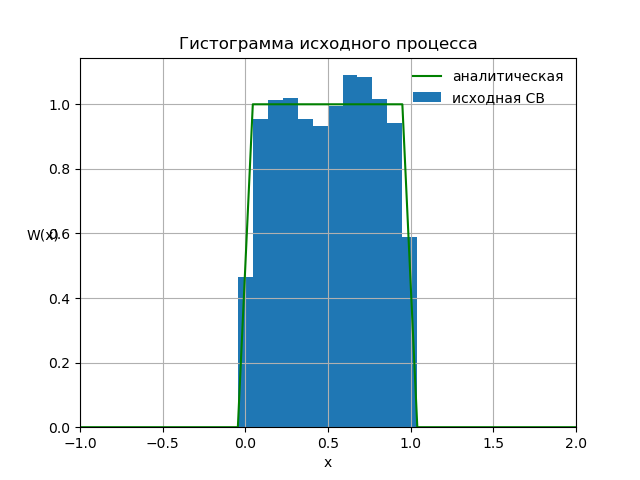

In [31]:
x_axis = np.linspace(-3*sigma_param, 3*sigma_param, N_EDGES)    # интервал значений, на котором задана плотность вероятноси
# Идеальная плотность вероятности исходного закона распределения
wx_analityc = (x_axis>=0) & (x_axis<=1)

plot_distrib_with_analyt(x_1, x_axis, wx_analityc, ['Гистограмма исходного процесса', 'исходная СВ', 'x', (-1, 2)])

*Графики функций, обеспечивающие нелинейное преобразование:*

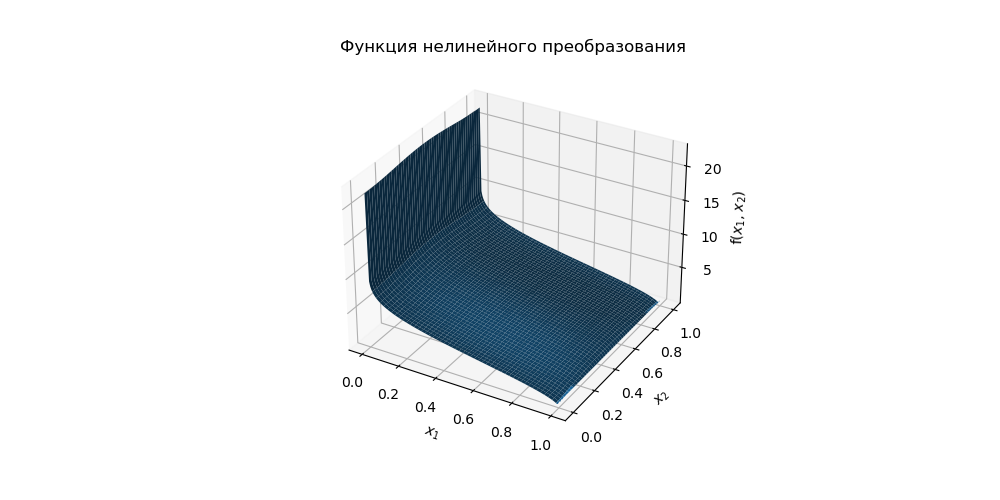

In [32]:
axises = np.linspace(1e-12, 1, N_EDGES)   # значение по осям (в данном случае достаточно сформировать только один массив,
                                        # т.к. значения, откладываемые по обеим осям, будет одинаковое)
# Функция нелинейного преобразования
f = lambda x_1, x_2: np.sqrt(a_param**2 - 2*sigma_param**2*np.log(x_1)
                             - 2*a_param*sigma_param*np.sqrt(-2*np.log(x_1))*np.cos(2*np.pi*x_2)) 

plot_3D_func(f, axises, axises)

*Формирование целевого закона распределения:*

In [33]:
y_custom = np.sqrt(a_param**2 - 2*sigma_param**2*np.log(x_1)
                   - 2*a_param*sigma_param*np.sqrt(-2*np.log(x_1))*np.cos(2*np.pi*x_2))

*Отображение плотности вероятности целевого закона распределения:*

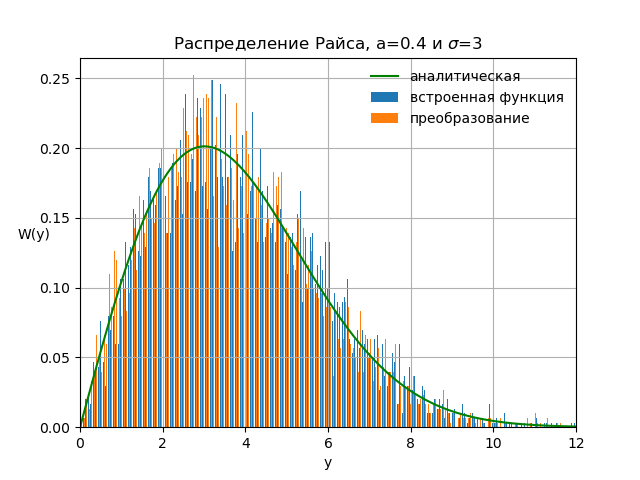

In [34]:
y_axis = np.linspace(0, 4*sigma_param, N_EDGES)
# Аналитическое значение СВ
w_analityc = rice.pdf(y_axis, b=b, loc=0, scale=sigma_param)

plot_distrib_with_analyt([y_lib_rice, y_custom], 
                         y_axis, 
                         w_analityc,
                         ['Распределение Райса, a=' + str(a_param) + ' и $\sigma$=' + str(sigma_param), 
                          ['встроенная функция', 'преобразование'], 
                          'y'])